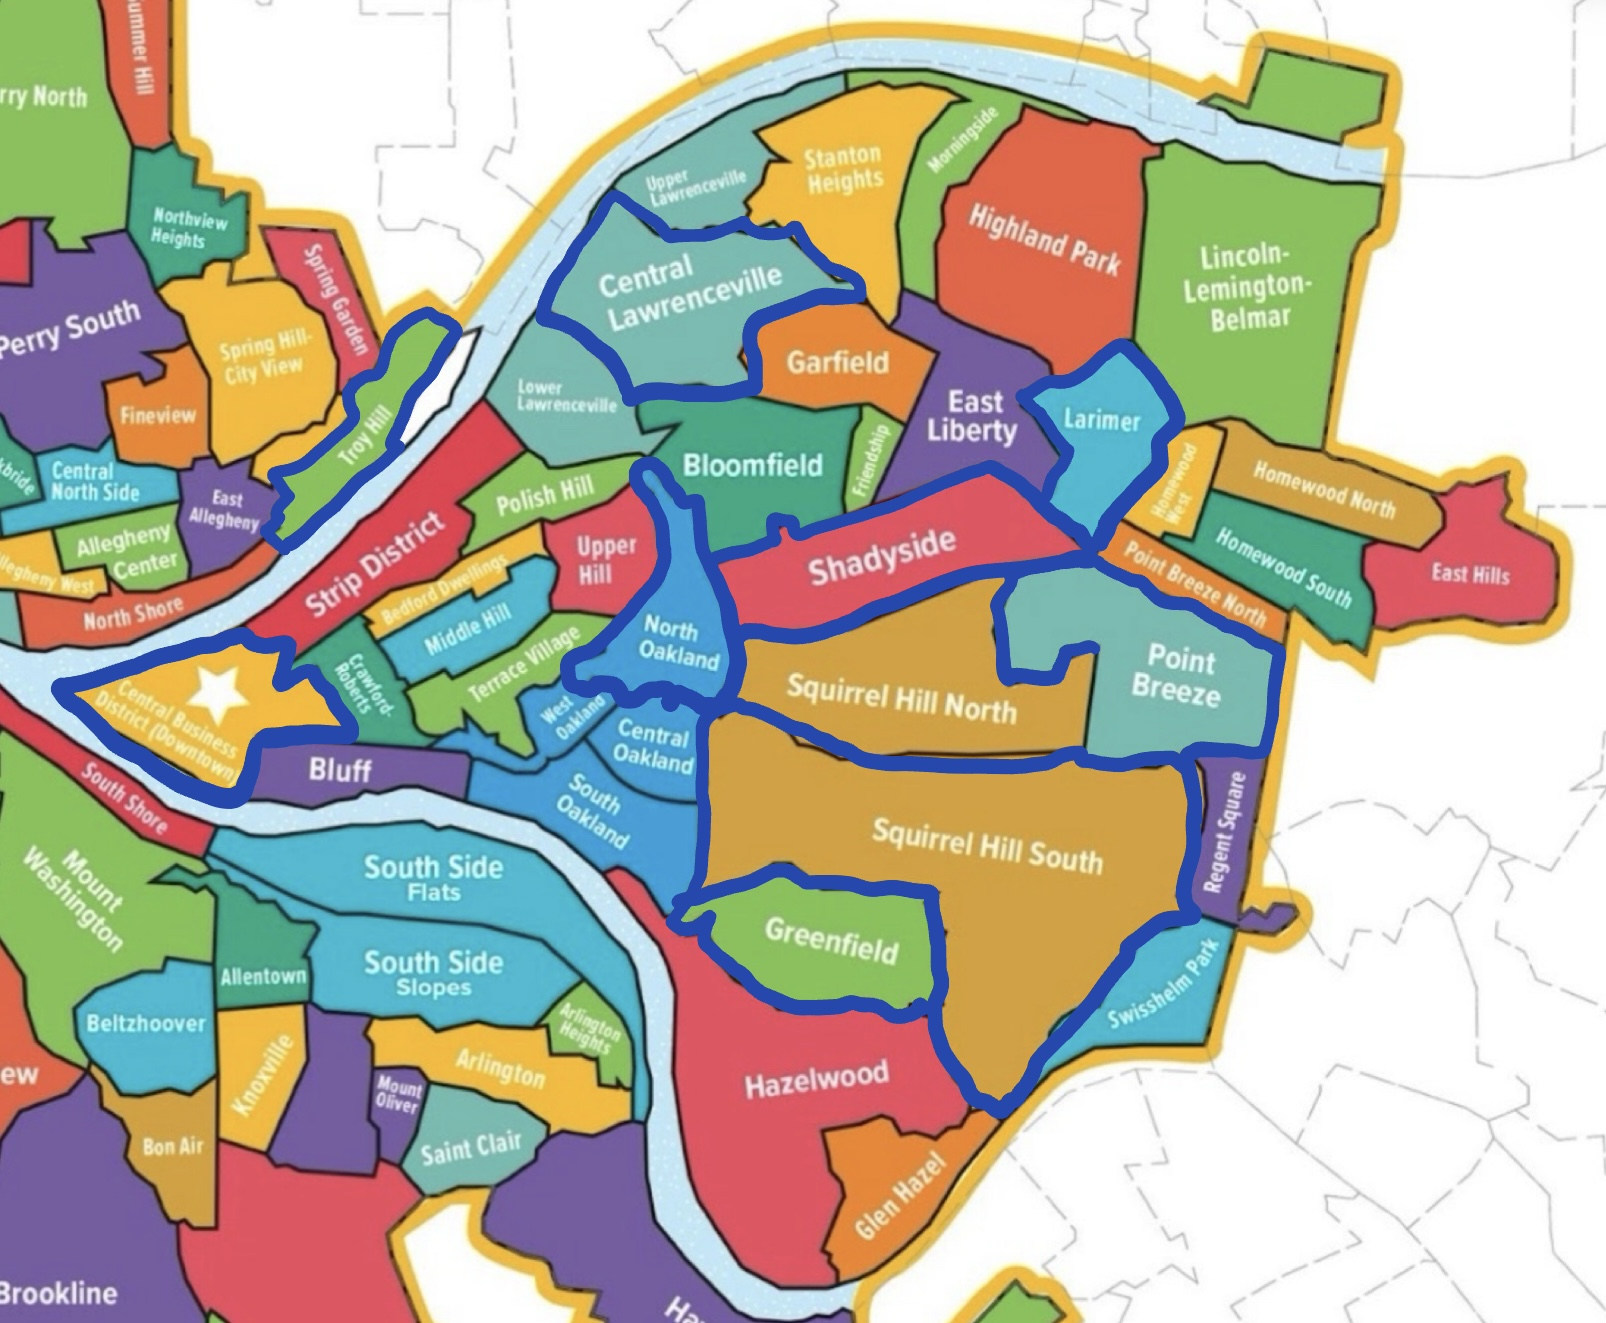

# Introduction
Point Breeze stands out as the best neighborhood in terms of crime rates, food/restaurant facility violations, and education compared to the other nine neighborhoods. This project analyzes Central Business District, Squirrel Hill South, North Oakland, Shadyside, Troy Hill, Point Breeze, Bloomfield, Central Lawrenceville, Greenfield, and Larimer based on these factors. These ten neighborhoods are located in the northeastern part of Pittsburgh as shown in the map above, and the comparison is based solely on data from the past five years. The dataset was filtered to include only recent data, excluding records older than five years (e.g., those from six, seven, or eight years ago). Overall, this project focuses on evaluating the factors that contribute to the quality of life in these neighborhoods.


## Arrest Data 
Our first metric focuses on crime rate. We used a dataset that includes all arrests in Pittsburgh to calculate the total arrest counts for our selected neighborhoods. Although the dataset is labeled as specific to Pittsburgh, we noticed an 'Outside City' label under the 'IncidentNeighborhood' column. To ensure we included only incidents within Pittsburgh, we first filtered out any entries marked as 'Outside City.' Then, we narrowed down the data to just the neighborhoods we wanted to compare. Using the 'IncidentNeighborhood' column, we tallied up all the arrests for each neighborhood. Finally, we created a bar graph to visualize the results clearly.

The neighborhood with the lowest crime rate over the past five years is Point Breeze.


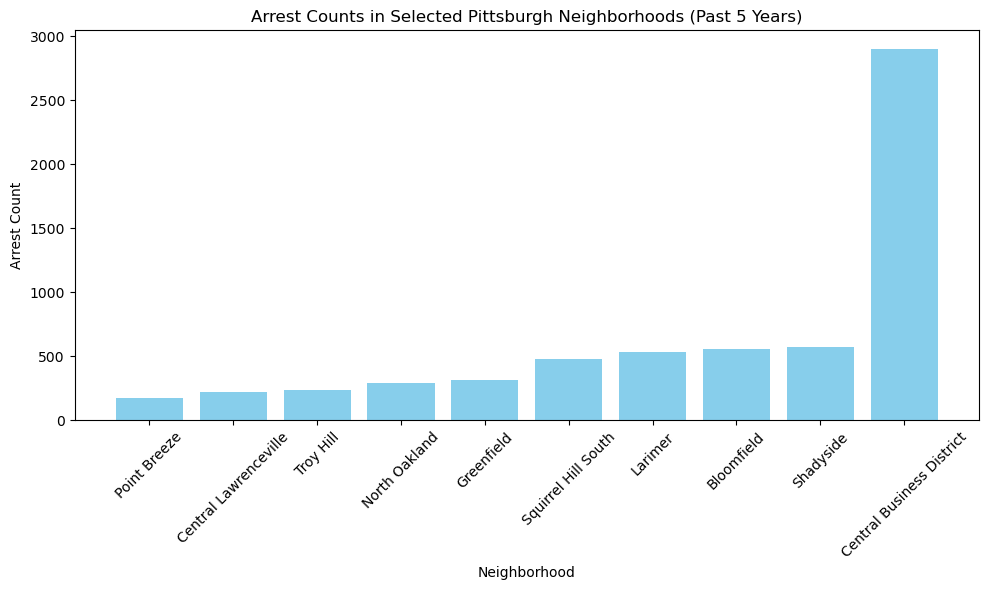

,neighborhood,arrest_count
0,Point Breeze,172
1,Central Lawrenceville,225
2,Troy Hill,240
3,North Oakland,288
4,Greenfield,315
5,Squirrel Hill South,476
6,Larimer,536
7,Bloomfield,558
8,Shadyside,574
9,Central Business District,2901


In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

file_path = 'Arrest.csv'
arrest_data = pd.read_csv(file_path)

# Convert ARRESTTIME to datetime
arrest_data['ARRESTTIME'] = pd.to_datetime(arrest_data['ARRESTTIME'], errors='coerce')

# Filter data for the last five years
current_year = datetime.now().year
five_years_ago = current_year - 5
recent_arrests = arrest_data[arrest_data['ARRESTTIME'].dt.year >= five_years_ago]

# Filter for arrests within Pittsburgh neighborhoods (excluding 'Outside City')
pittsburgh_arrests = recent_arrests[recent_arrests['INCIDENTNEIGHBORHOOD'] != 'Outside City']

# Neighborhood of interets
neighborhoods_of_interest = [
    'Central Business District',
    'Squirrel Hill South',
    'North Oakland',
    'Shadyside',
    'Troy Hill',
    'Point Breeze',
    'Bloomfield',
    'Central Lawrenceville',
    'Greenfield',
    'Larimer'
]

# Filter arrests for neighborhoods of interest
filtered_arrests = pittsburgh_arrests[pittsburgh_arrests['INCIDENTNEIGHBORHOOD'].isin(neighborhoods_of_interest)]

# Count arrests per neighborhood
arrest_counts = filtered_arrests['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
arrest_counts.columns = ['neighborhood', 'arrest_count']

# Sort arrest counts by count
sorted_arrest_counts = arrest_counts.sort_values(by='arrest_count').reset_index(drop=True)

# Find the neighborhood with the lowest crime rate
lowest_crime_neighborhood = sorted_arrest_counts.iloc[0]

# Display neighborhood with the lowest crime rate
print(f"The neighborhood with the lowest crime rate over the past five years is {lowest_crime_neighborhood['neighborhood']}.")

# Plot the arrest counts
plt.figure(figsize=(10, 6))
plt.bar(sorted_arrest_counts['neighborhood'], sorted_arrest_counts['arrest_count'], color='skyblue')
plt.title("Arrest Counts in Selected Pittsburgh Neighborhoods (Past 5 Years)")
plt.xlabel("Neighborhood")
plt.ylabel("Arrest Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
sorted_arrest_counts





### Food Inspections
For this dataset, we include only low inspection violations, as they do not pose any health risks to consumers compared to medium and high violations.


                neighborhood  medium_violations  high_violations  \
0                 Greenfield                150               57   
1      Central Lawrenceville                511              277   
2                  Shadyside                513              304   
3                 Bloomfield                535              319   
4                    Larimer                739              444   
5  Central Business District                952              464   
6        Squirrel Hill South               1094              559   
7               Point Breeze               1089              571   
8              North Oakland               1164              651   
9                  Troy Hill               1598              982   

   total_violations  
0               207  
1               788  
2               817  
3               854  
4              1183  
5              1416  
6              1653  
7              1660  
8              1815  
9              2580  


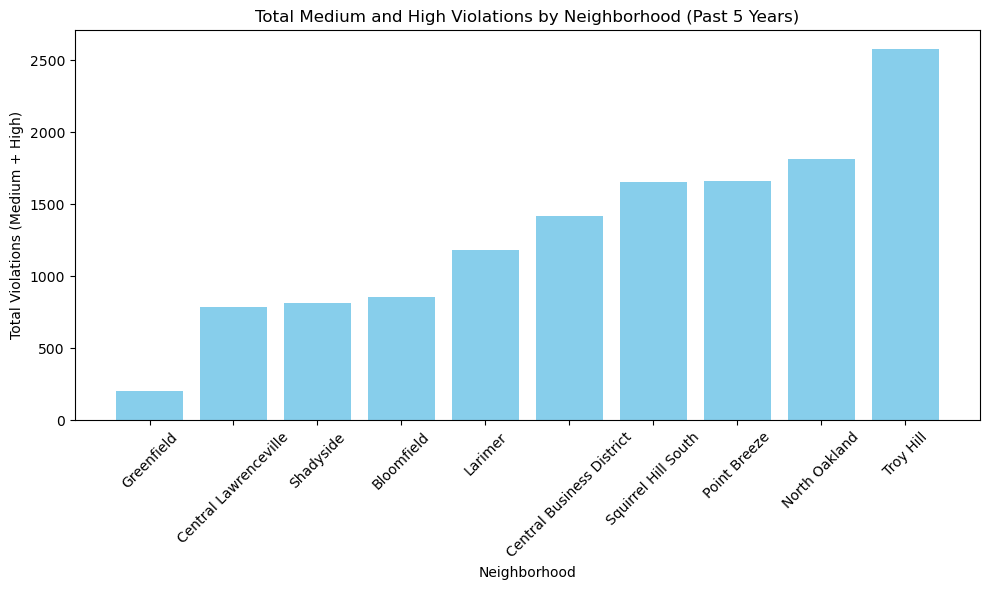

In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Food_Inspections.csv"  
data = pd.read_csv(file_path)

# Convert inspection date column to datetime 
data['inspect_dt'] = pd.to_datetime(data['inspect_dt'], errors='coerce')

# Zip codes of interested neighborhoods
zip_codes_of_interest = {
    'Central Business District': [15219],
    'Squirrel Hill South': [15217],
    'North Oakland': [15213, 15260],
    'Shadyside': [15232],
    'Troy Hill': [15222],
    'Point Breeze': [15208, 15221],
    'Bloomfield': [15224],
    'Central Lawrenceville': [15201],
    'Greenfield': [15207],
    'Larimer': [15206]
}

# Filter for inspections within the last 5 years
five_years_ago = datetime.now().year - 5
recent_inspections = data[data['inspect_dt'].dt.year >= five_years_ago]

# Calculate violation counts by neighborhood
violation_counts = []
for neighborhood, zips in zip_codes_of_interest.items():
    neighborhood_data = recent_inspections[recent_inspections['zip'].isin(zips)]
    medium_violations = neighborhood_data[neighborhood_data['medium'] == 'T'].shape[0]
    high_violations = neighborhood_data[neighborhood_data['high'] == 'T'].shape[0]
    total_violations = medium_violations + high_violations
    violation_counts.append({
        'neighborhood': neighborhood,
        'medium_violations': medium_violations,
        'high_violations': high_violations,
        'total_violations': total_violations
    })

# DataFrame for violation counts
violation_counts_df = pd.DataFrame(violation_counts).sort_values(by='total_violations').reset_index(drop=True)

# Display violation counts
print(violation_counts_df)

# Total violations by neighborhood
plt.figure(figsize=(10, 6))
plt.bar(violation_counts_df['neighborhood'], violation_counts_df['total_violations'], color='skyblue')
plt.title("Total Medium and High Violations by Neighborhood (Past 5 Years)")
plt.xlabel("Neighborhood")
plt.ylabel("Total Violations (Medium + High)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
